In [8]:
import argparse
import numpy as np
import uproot3 as uproot
import math
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import time
from matplotlib.colors import LogNorm

In [2]:
#### Specify a file by specifying the path to the file ####
file_path = './marley.root'

detector_x_dim = 1000
detector_y_dim = 1000

In [3]:
### Open the file and then read out the data ####
with uproot.open(file_path) as f:
    #--------------------------------------------------------------------------
    # get metadata from ROOT file
    #--------------------------------------------------------------------------

    metadata = f['metadata']

    #--------------------------------------------------------------------------
    # get event tree from ROOT file
    #--------------------------------------------------------------------------

    tree = f['event_tree']

    # list of branches that we want to access
    branches = [

        # event number
        'event',

        # MC particle information [Q_PIX_GEANT4]
        'particle_track_id', 'particle_pdg_code',
        'particle_mass', 'particle_initial_energy',

        # MC hit information [Q_PIX_GEANT4]
        'hit_energy_deposit', 'hit_track_id', 'hit_process_key',
        'hit_start_x', 'hit_start_y', 'hit_start_z', 'hit_start_t',
        'hit_end_x', 'hit_end_y', 'hit_end_z', 'hit_end_t',


    ]
    
    #--------------------------------------------------------------------------
    # iterate through the event tree
    #--------------------------------------------------------------------------

    for arrays in tree.iterate(branches=branches, namedecode='utf-8'):

        # get event number array
        event_array = arrays['event']
        
        # get number of events
        number_events = len(event_array)
         # get MC particle arrays
        particle_track_id_array = arrays['particle_track_id']
        particle_pdg_code_array = arrays['particle_pdg_code']

        # get MC hit arrays
        hit_track_id_array = arrays['hit_track_id']
        
        # get MC start x, y, z, and t positions of the deposited energy
        hit_start_x_array = arrays['hit_start_x']
        hit_start_y_array = arrays['hit_start_y']
        hit_start_z_array = arrays['hit_start_z']
        hit_start_t_array = arrays['hit_start_t']
        
        # get MC end x, y, z, and t positions of the deposited energy
        hit_end_x_array = arrays['hit_end_x']
        hit_end_y_array = arrays['hit_end_y']
        hit_end_z_array = arrays['hit_end_z']
        hit_end_t_array = arrays['hit_end_t']
        
        # get MC energy deposited
        hit_energy_deposit_array = arrays['hit_energy_deposit']
        hit_process_key_array = arrays['hit_process_key']


In [4]:
def LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint, epsilon=1e-6):
 
    ndotu = planeNormal.dot(rayDirection)
    if abs(ndotu) < epsilon:
        #raise RuntimeError("no intersection or line is within plane")
        print('No intersection or line is within the plane')
        Psi = []
        Psi.append([0.,0.,0.])
        return Psi
 
    w = rayPoint - planePoint
    si = -planeNormal.dot(w) / ndotu
    Psi = w + si * rayDirection + planePoint
    return Psi

In [66]:
### Variables for checking things ####
Phi_array = []
CosineTheta_array = []
dx_array = []
dy_array = []
dz_array = []

IntersectionX_array = []
IntersectionY_array = []

### Loop over the events ####
#for idx in range(number_events):
idx = 0
while(idx < 1):
    
    position = []
    
    ### Number of hits for this event ###
    nMC_Hits = hit_track_id_array[idx]
    ### x, y, z, t start for this event ###
    x_start = hit_start_x_array[idx]
    y_start = hit_start_y_array[idx]
    z_start = hit_start_z_array[idx]
    t_start = hit_start_t_array[idx]
    
    ### x, y, z, t end for this event ###
    x_end = hit_end_x_array[idx]
    y_end = hit_end_y_array[idx]
    z_end = hit_end_z_array[idx]
    t_end = hit_end_t_array[idx]
    
    ### Hit Energy ###
    Hit_Energy = hit_energy_deposit_array[idx]
    
    #############################################
    #print('Event Number', idx)
    #print('Number of MC Hits', len(nMC_Hits))
    #print('\n')
    #############################################
    idx+=1
    ### Loop over all the MC Truth Event Hits ####
    for nhit in range(len(nMC_Hits)):
        ########################################################
        #print('x_start ',x_start[nhit] )
        #print('x_end ', x_end[nhit])
        #print('Energy ',Hit_Energy[nhit])
        ########################################################
        
        ### Taking the "W-Value" for scintillation from https://lar.bnl.gov/properties/#scint
        ### we estimate 19.5 eV / photon, so we can easily calculate the number of photons 
        ### produced by each energy deposition (note: we have to convert the units of Hit_Energy
        ### to eV from MeV)
        
        n_photons = int(Hit_Energy[nhit]*10E6 / 19.5) ### note: I am using the 'int' function to round
        ### print(n_photons)
        
        ### Generate enough random numbers for these photons
        #rand_num = np.random.uniform(0,1,n_photons)
        print('nphotons: ', n_photons)
        ### For each simulated photon, calculate a random direction vector
        a = 0
        #while(a < n_photons):
        while(a < 800):
            
            # Phi is 2pi * RandomNumber
            #phi = 6.28318 * rand_num[a]
            phi = np.random.uniform(0,np.pi*2)
            
            #Cosine Theta is 2*Random Number - 1
            #costheta = 2*rand_num[a] - 1.
            costheta = np.random.uniform(-1,1)
            
            #Sine Theta is sqrt(1 - CosTheta*CosTheta)
            #sintheta = math.sqrt(1 - costheta*costheta)
            theta = np.arccos( costheta )
            
            ### Storing the values calculated so I can histogram them ###
            Phi_array.append(phi)
            CosineTheta_array.append(costheta)
            
            ### Now calculate the unit vectors
            #dx = math.cos(phi) * sintheta;
            #dy = math.sin(phi) * sintheta;
            #dz = costheta;
            
            ### Now calculate the unit vectors
            #based on this webpage https://gist.github.com/andrewbolster/10274979
            dx = math.cos(phi) * math.sin(theta);
            dy = math.sin(phi) * math.sin(theta);
            dz = math.cos(theta);
            
            
            ### Storing the values calculated so I can histogram them ###
            dx_array.append(dx)
            dy_array.append(dy)
            dz_array.append(dz)
            
            #dx = x_end[nhit] + (math.cos(phi) * sintheta)
            #dy = y_end[nhit] + (math.sin(phi) * sintheta)
            #dz = z_end[nhit] + costheta
            
            ###########################################
            #print(dx,dy,dz)
            ###########################################
            
            #Define plane
            planeNormal = np.array([0, 0, 1])
            planePoint = np.array([1, 1, 0]) #Any point on the plane
 
            #Define ray
            rayDirection = np.array([dx, dy, dz])
            rayPoint = np.array([x_end[nhit], y_end[nhit], z_end[nhit]]) #Any point along the ray
 
            Psi = LinePlaneCollision(planeNormal, planePoint, rayDirection, rayPoint)
            #print ("intersection at", Psi)
            if(Psi[0]> 0. and Psi[0] < detector_x_dim and Psi[1] > 0. and Psi[1] < detector_y_dim):
                
                ### Storing the values calculated so I can histogram them ###
                IntersectionX_array.append(Psi[0])
                IntersectionY_array.append(Psi[1])
                
                ### Translate the X and Y position to a Pixel number by dividing my the pixel spacing
                ### (e.g. 0.4 m)
                PIXX = np.ceil(Psi[0]/0.4)
                PIXY = np.ceil(Psi[1]/0.4)
                ### Make a uniquid Pixel ID based on the X and Y Pixel Number
                PID = int(PIXX*10000+PIXY)
                ### Append the X position, Y Position, and the unique Pixel ID to a list
                position.append([Psi[0],Psi[1], PID])
                #print ("intersection at", position)
                #print ('\n')
            
            a+=1
        
        

nphotons:  180230
nphotons:  590057
nphotons:  568686
nphotons:  90208
nphotons:  669167
nphotons:  457389
nphotons:  382227
nphotons:  248959
nphotons:  89380
nphotons:  137947
nphotons:  6380
nphotons:  117556
nphotons:  154325
nphotons:  151505
nphotons:  66963
nphotons:  155877
nphotons:  27485
nphotons:  23847
nphotons:  17040
nphotons:  13554
nphotons:  33375
nphotons:  10994
nphotons:  13412
nphotons:  16465
nphotons:  6592
nphotons:  6760
nphotons:  8905
nphotons:  8587
nphotons:  8253
nphotons:  5014
nphotons:  3600
nphotons:  6484
nphotons:  3460
nphotons:  3845
nphotons:  1903
nphotons:  64818
nphotons:  150499
nphotons:  56782
nphotons:  46825
nphotons:  33211
nphotons:  28796
nphotons:  29835
nphotons:  26225
nphotons:  17896
nphotons:  26498
nphotons:  35485
nphotons:  16451
nphotons:  7780
nphotons:  11147
nphotons:  8786
nphotons:  8950
nphotons:  13881
nphotons:  8599
nphotons:  10142
nphotons:  8237
nphotons:  40272
nphotons:  22307
nphotons:  91040
nphotons:  81095
n

Text(0.5, 0, 'dz')

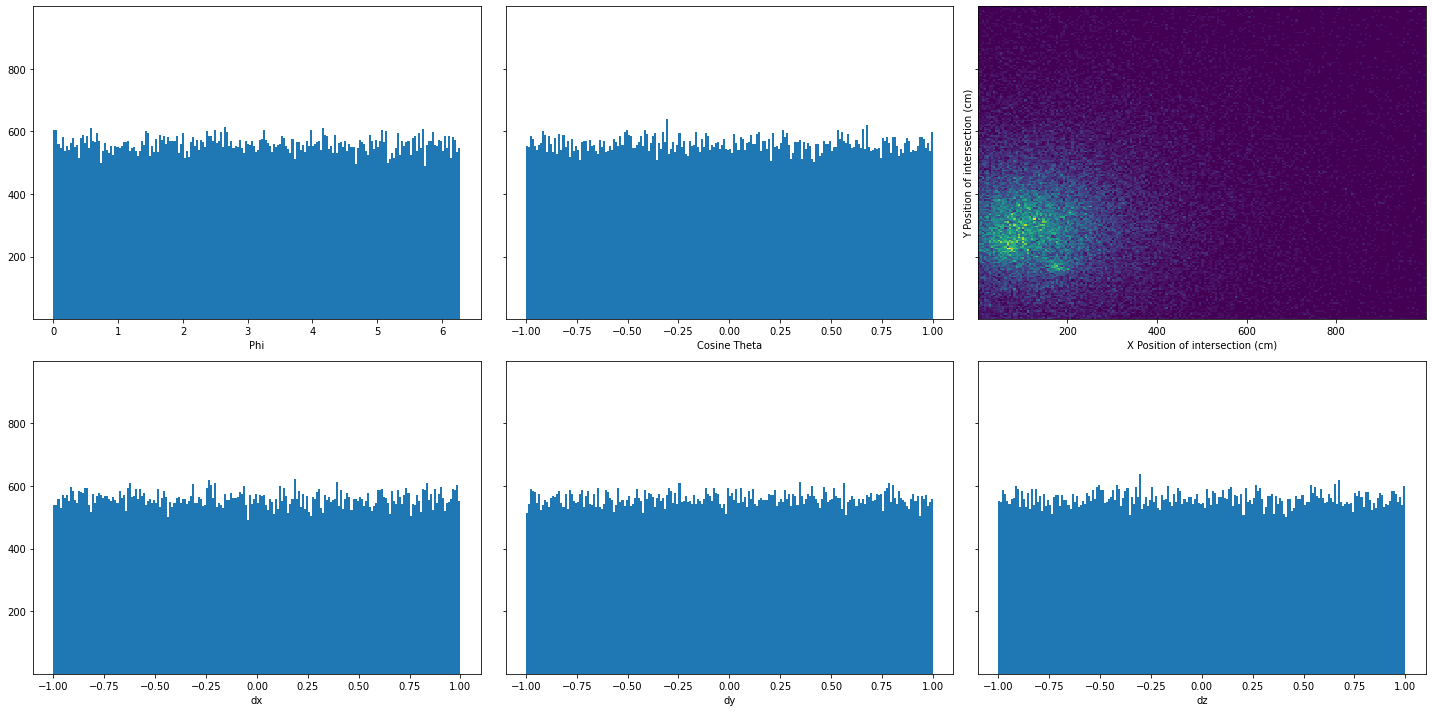

In [67]:
fig,axs = plt.subplots(2, 3, sharey=True, tight_layout=True, figsize=(20,10))
axs[0][0].hist(Phi_array, bins = 200)
axs[0][0].set_xlabel('Phi')
axs[0][1].hist(CosineTheta_array, bins = 200)
axs[0][1].set_xlabel('Cosine Theta')
axs[0][2].hist2d(IntersectionX_array, IntersectionY_array, bins = 200)
axs[0][2].set_xlabel('X Position of intersection (cm)')
axs[0][2].set_ylabel('Y Position of intersection (cm)')
axs[1][0].hist(dx_array, bins = 200)
axs[1][0].set_xlabel('dx')
axs[1][1].hist(dy_array, bins = 200)
axs[1][1].set_xlabel('dy')
axs[1][2].hist(dz_array, bins = 200)
axs[1][2].set_xlabel('dz')

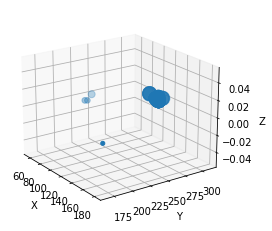

In [61]:
fig = plt.figure()
ax = fig.gca(projection='3d')
colors = ('r', 'g', 'b', 'k')
plt.scatter(x_end, y_end, z_end)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(elev=20., azim=-35)

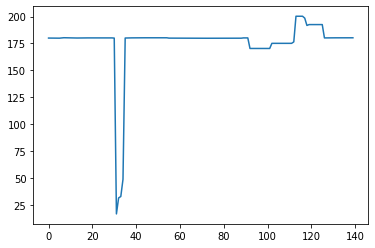

In [77]:
plt.plot(z_end)

In [68]:
#print(position)
tt = np.array(position)
#print(tt[0:3])
#print(len(tt))
#tt[:,2]

In [69]:
### Print the number of unique ID's which correspond to the pixels hit ###
print(len(np.unique(tt[:,2])))
np.unique(tt[:,2])

57715


array([1.0092000e+04, 1.0106000e+04, 1.0110000e+04, ..., 2.4981506e+07,
       2.4992395e+07, 2.5001224e+07])

In [71]:
### Make an Array of all pixels that live in the detector ###
ALL_PIX_IDs = []

### This should give a count of all the pixel numbers in the X and Y
XX= int (detector_x_dim / 0.4)
YY=int (detector_y_dim / 0.4)

while(XX>=1):
    while(YY>=1):
        ### Generate all the Pixel ID's for all pixels
        mine = XX*10000+YY
        ### Put them in a list
        ALL_PIX_IDs.append(mine)
        YY-=1
    YY=int (detector_y_dim / 0.4)
    XX-=1

In [72]:
len(ALL_PIX_IDs)

6250000

In [73]:
ALL_PIX_IDs[-1]

10001

In [74]:
len(np.unique(tt[:,2]))

57715

In [75]:
### This is the master data list that records the pixel number and number of hits 
### for that pixel
DataList = []

### This is a dummy counter 
ct = 0

### This records the time we started (just too keep track of how long this takes)
t0 = time.time()
### Loop over all the Pixel IDs
for unid in ALL_PIX_IDs:
    ###This gives the X, Y position of every unique pixel ID
    location = np.where(tt[:,2]==unid)[0]
    ### This gives the number of photons which struck a particular pixel ID
    count = len(location)
    
    ### We convert back the unique pixel ID to a X location and Y Location
    frac_part, int_part = np.modf(unid/10000)
    ### We use the integer part of the ID(rounded to 4 sig figs) to record the X Pixel number
    X_loc = round(int_part, 4)
    ### We use the fraction x 10,000 part of the ID (rounded to 4 sig figs) to record the Y Pixel number
    Y_loc = round(frac_part*1e4, 4)
    ### Now we append the full list of number of photons per pixel
    DataList.append([X_loc, Y_loc, count])
    
    ### Bump the dummy counter
    ct+=1
    ### Print where we are in the list periodically
    if((ct%100000)==0):
        print(ct)
        print("time ", time.time()-t0)
### Convert the array to a numpy array
DataList = np.array(DataList)
    

100000
time  21.318353176116943
200000
time  42.19684171676636
300000
time  64.3440215587616
400000
time  84.81777167320251
500000
time  105.6411190032959
600000
time  125.57000875473022
700000
time  146.76382422447205
800000
time  166.7040011882782
900000
time  186.66033554077148
1000000
time  207.05240607261658
1100000
time  228.70073008537292
1200000
time  251.09108710289001
1300000
time  272.0245339870453
1400000
time  294.90160298347473
1500000
time  314.9913239479065
1600000
time  334.75594782829285
1700000
time  356.68943452835083
1800000
time  376.87494015693665
1900000
time  397.35323333740234
2000000
time  417.272828578949
2100000
time  437.4826695919037
2200000
time  457.37884855270386
2300000
time  477.2811779975891
2400000
time  498.24189949035645
2500000
time  521.3947379589081
2600000
time  543.0271015167236
2700000
time  563.6998126506805
2800000
time  585.1108412742615
2900000
time  606.3605899810791
3000000
time  627.883293390274
3100000
time  649.0229580402374
320000

<ipython-input-76-16c6b29b90e6>:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(X,Y,Z, norm=LogNorm())


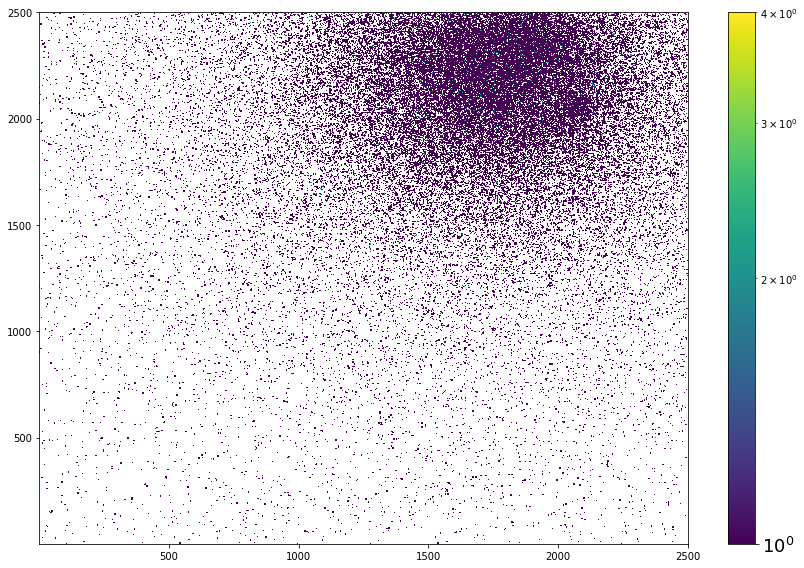

In [76]:
### Make the master plot
plt.figure(figsize=(12,8))
x=DataList[:,0]
y=DataList[:,1]
z=DataList[:,2]
x=np.unique(x)
y=np.unique(y)
X,Y = np.meshgrid(x,y)
Z=z.reshape(len(y),len(x))
plt.pcolormesh(X,Y,Z, norm=LogNorm())



#plt.semilogx()
#plt.xlim(1e-9,1e-3)
#plt.ylim(0.1,99.9)
#plt.xlabel(r"Background Index [ckky]",fontsize=20)
#plt.ylabel(r"Signal Efficacy [%]",fontsize=20)
#plt.xticks(fontsize=18)
#plt.yticks(fontsize=18)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
#cb.ax.set_yticklabels(['0','1','2','>3'])
#cb.set_label('Half Life [yr]',fontsize=20)
#plt.text(1.8e-9,75,'Normal Hierarchy',fontsize=22, color='r')
#plt.text(2e-9,5,'Inverted Hierarchy',fontsize=22, color='r')
#plt.grid(True, which="both",color='k',alpha=0.3)
#plt.scatter(1.625e-5,0.286*100)
#plt.scatter(5.045e-6,0.238*100)
plt.tight_layout()
#plt.savefig("new_sens.pdf")
plt.show()

In [87]:
aa = np.array([1,2,3,1,1,2,3])
np.where(aa==1)

(array([0, 3, 4]),)

In [94]:
tt[0]

array([2.06918777e+02, 3.38046740e+02, 5.18084600e+06])

In [100]:
int(np.ceil(tt[0][0]/0.4))

518

In [101]:
int(np.ceil(tt[0][1]/0.4))

846

In [89]:
5180846/10000

518.0846

In [99]:
int(518.0846)
frac_part, int_part = np.modf(518.0846)
X_loc = round(int_part, 4)
Y_loc = round(frac_part*1e4, 4)
print(X_loc)
print(Y_loc)

518.0
846.0


In [92]:
print(a)

0.0846000000000231


In [93]:
print(b)

518.0
